#### Problem Statment


The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.
Each row is labelled as either having a salary greater than ">50K" or "<=50K".

The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.

#### Steps performed:

-Import all the important Libraries which is required during building model.

-Import the dataset and read the dataset. The dataset is about Adult income.

-This is classification problem.

-Perform the EDA.

-In the dataset check if the null values are present or not.

-After finding null values in some features i fill the null values,and again check if null values present or not.

-Visualize the data.

-We have target variable income and the  datatype of the income is object,because it contain values like <=50k,>50k. 

-So I converted those values in 0 and 1. 

-Plot the correlation chart.

-I split the data between categorical and numerical data seperatly.

-Read the categorical and numerical data.

-Check the outliers.

-Convert all categorical data into numerical data using get dummies method and drop first columns.

-Merge categorical converted column and numerical dataset.

-Check the datatype again.

-The datatype for all columns is unit 8, now convert it into integer.

-Creating dependent and independent variable and store it in new variable x and y.

-Doing train test split process.

-After performing get dummies there are new features added in our data.

-So i performed feature selection process using mutual info classif.

-Draw one barplot and with the help of that barplot select top 15 features for model building.

-After finding top 15 features again read the top 15 features data.

-Again split the data in train test split with top 15 features.

-Build one model without scaling to check score and compare the score with scaling model.

-Scale the data with new 15 features and i have use standard scalar to scale down the values between 0 to 1.

-Build diff diff classification models and compare the score which is the best model.

-Create one table to check fastly which model is best  and score of each model.

-Draw auc roc curve of logistic and svm algorithm.

In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.ndim

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Check the Null values in the dataset

In [8]:
df.isna().sum()


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Fill the null values

In [9]:
df.workclass.mode()[0]

'Private'

In [10]:
df.occupation.mode()[0]

'Prof-specialty'

In [11]:
df['native-country'].mode()[0]

'United-States'

In [12]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])

In [13]:
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])

In [14]:
df['native-country']=df['native-country'].fillna(df['native-country'].mode()[0])

In [15]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data Visuallization

<AxesSubplot:xlabel='age', ylabel='gender'>

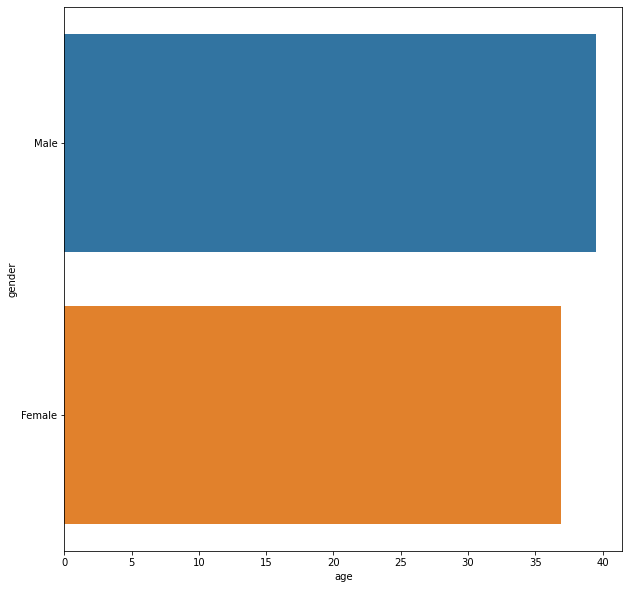

In [117]:
plt.figure(figsize=(10,10))
sns.barplot('age','gender',data=df,ci=None)

So in this plot we can see that above 40 age most pepole have greater than 50k salary

<AxesSubplot:xlabel='workclass', ylabel='age'>

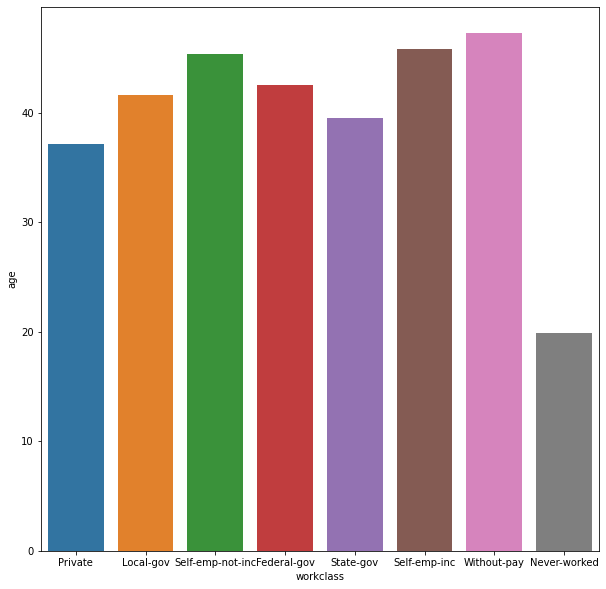

In [17]:
plt.figure(figsize=(10,10))
sns.barplot('workclass','age',data=df,ci=None)

-From the above graph never worked class has age below 20 using which we can say that as age below 20 they are student or they are in learning phase.
-and the highest age is above 50 for the without pay class 

<AxesSubplot:xlabel='gender', ylabel='count'>

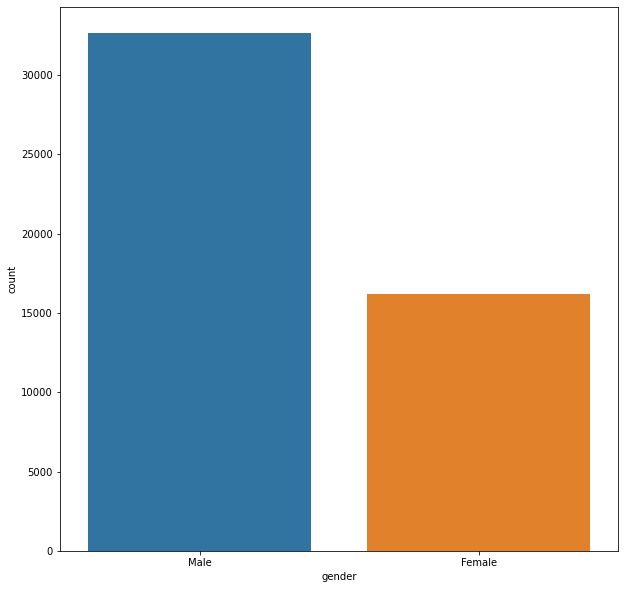

In [18]:
plt.figure(figsize=(10,10))
sns.countplot('gender',data=df)

there is male count is more than female count

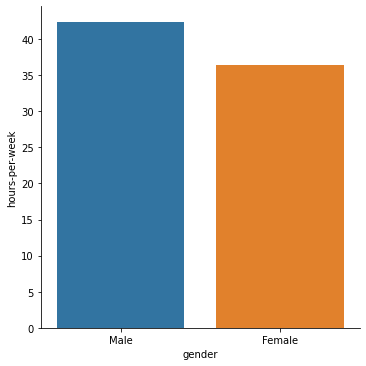

In [19]:
sns.catplot(x="gender", y="hours-per-week", kind="bar", data=df,ci=None)

Male are working more than Female in hours-per-week 

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

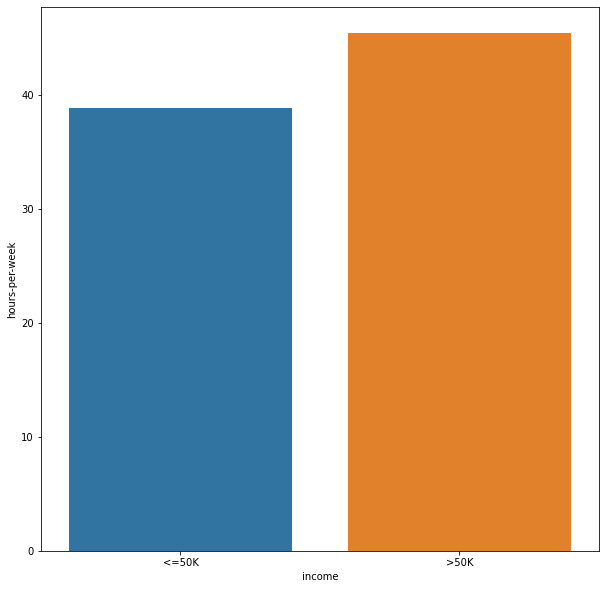

In [20]:
plt.figure(figsize=(10,10))
sns.barplot('income',"hours-per-week",data=df,ci=None)

if the hours in work is more than 35 then the income is greater than 50k if the hours in work is less than 35 means salary is less than or equal to 50k

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [22]:
# here we convert >50k income to 1 and <=50k income to 0 so it is easy for us to compare

In [23]:
df['income'] = df['income'].replace('>50K', 1)
df['income'] = df['income'].replace('<=50K', 0)

In [24]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


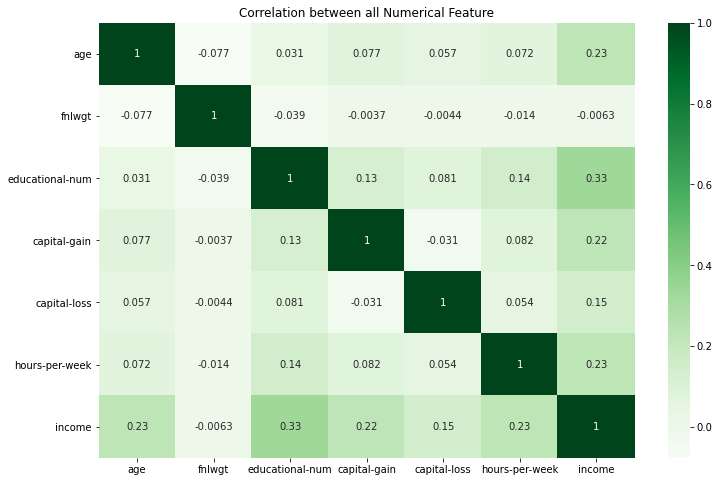

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.title("Correlation between all Numerical Feature")
plt.show()

Here we check the relation between target variable and other independent numeric variables

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


we split the data type between categorical and numerical in seprate list

In [27]:

obj_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='O':
        obj_col.append(i)
    else:
        num_col.append(i)

In [28]:
print('catogerical variable',obj_col)
print('numerical varibale',num_col)

catogerical variable ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical varibale ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


In [29]:
obj_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [30]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [31]:
# Creating new dataframe for catogerical and numeric features

In [32]:
cat_data=df.loc[:,obj_col]

In [33]:
cat_data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [34]:
num_data=df.loc[:,num_col]

In [35]:
num_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0
...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0
48838,40,154374,9,0,0,40,1
48839,58,151910,9,0,0,40,0
48840,22,201490,9,0,0,20,0


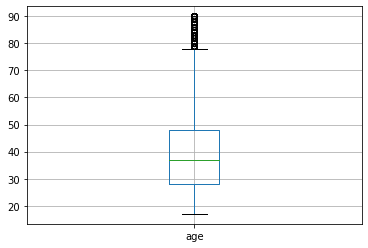

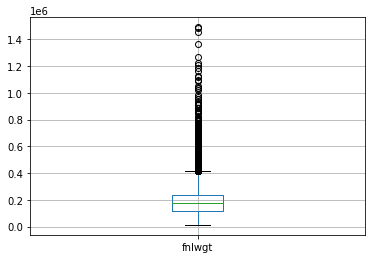

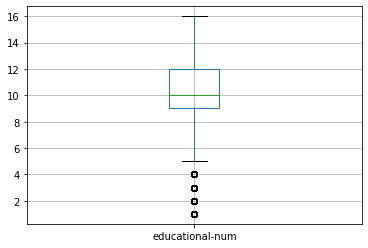

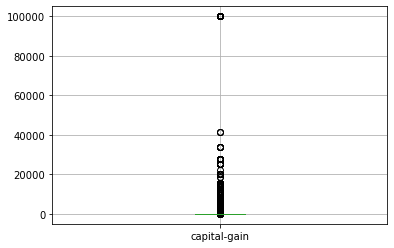

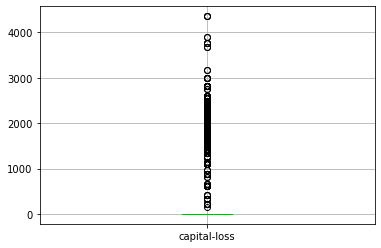

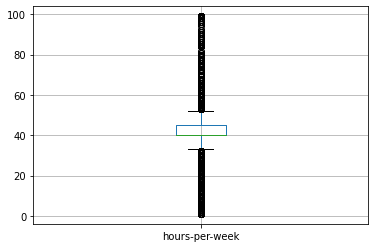

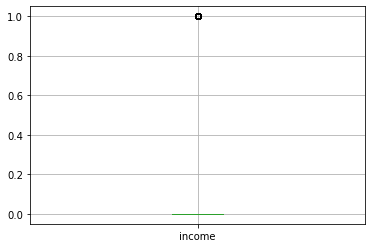

In [36]:
# check the outliers here
for i in num_data:
    df.boxplot(i)
    plt.show()

#### convert categorical data into numerical data using get dummies and drop first columns 

In [37]:
cat_data_dummies=pd.get_dummies(cat_data,drop_first=True)

In [38]:
cat_data_dummies

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### merge numeric and categorical data

In [39]:
df_main=pd.concat([cat_data_dummies,num_data],axis=1)

In [40]:
df_main

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,25,226802,7,0,0,40,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,38,89814,9,0,0,50,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,28,336951,12,0,0,40,1
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,44,160323,10,7688,0,40,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,18,103497,10,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,0,0,...,1,0,0,27,257302,12,0,0,38,0
48838,0,0,1,0,0,0,0,0,0,0,...,1,0,0,40,154374,9,0,0,40,1
48839,0,0,1,0,0,0,0,0,0,0,...,1,0,0,58,151910,9,0,0,40,0
48840,0,0,1,0,0,0,0,0,0,0,...,1,0,0,22,201490,9,0,0,20,0


# check the datatype

In [41]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   workclass_Local-gov                        48842 non-null  uint8
 1   workclass_Never-worked                     48842 non-null  uint8
 2   workclass_Private                          48842 non-null  uint8
 3   workclass_Self-emp-inc                     48842 non-null  uint8
 4   workclass_Self-emp-not-inc                 48842 non-null  uint8
 5   workclass_State-gov                        48842 non-null  uint8
 6   workclass_Without-pay                      48842 non-null  uint8
 7   education_11th                             48842 non-null  uint8
 8   education_12th                             48842 non-null  uint8
 9   education_1st-4th                          48842 non-null  uint8
 10  education_5th-6th                          488

# change the data type

In [42]:
for feature in df_main:
    df_main[feature]=df_main[feature].astype(int)

In [43]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   workclass_Local-gov                        48842 non-null  int32
 1   workclass_Never-worked                     48842 non-null  int32
 2   workclass_Private                          48842 non-null  int32
 3   workclass_Self-emp-inc                     48842 non-null  int32
 4   workclass_Self-emp-not-inc                 48842 non-null  int32
 5   workclass_State-gov                        48842 non-null  int32
 6   workclass_Without-pay                      48842 non-null  int32
 7   education_11th                             48842 non-null  int32
 8   education_12th                             48842 non-null  int32
 9   education_1st-4th                          48842 non-null  int32
 10  education_5th-6th                          488

In [44]:
#creating dependent and independent variable
x=df_main.drop('income',axis=1)
y=df_main['income']

In [45]:
x.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,25,226802,7,0,0,40
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,38,89814,9,0,0,50
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,28,336951,12,0,0,40
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,44,160323,10,7688,0,40
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,18,103497,10,0,0,30


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Here we doing feature selection for model building

In [47]:
# Use mutual info classifier for feature selection
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([1.02051709e-03, 9.87507927e-04, 1.19142941e-02, 1.03460186e-02,
       2.24672046e-03, 2.72760467e-03, 0.00000000e+00, 5.31936057e-03,
       2.74582425e-03, 1.58306466e-03, 3.40714866e-03, 2.65177881e-03,
       1.96942073e-03, 0.00000000e+00, 0.00000000e+00, 1.27960078e-02,
       7.64123809e-03, 1.15128726e-02, 1.03693834e-02, 1.78030800e-03,
       1.10338743e-02, 1.41775483e-03, 0.00000000e+00, 1.06221633e-01,
       3.28222113e-03, 6.70063530e-02, 4.97040911e-03, 8.70987544e-04,
       0.00000000e+00, 2.27611982e-03, 2.08762968e-02, 2.29013609e-03,
       1.93884570e-03, 0.00000000e+00, 1.53994314e-02, 2.74247354e-03,
       5.99862640e-03, 1.30871542e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.18750983e-02, 8.25582746e-03, 3.98671630e-02,
       9.25548871e-03, 6.31863439e-03, 1.63727638e-03, 3.30453931e-03,
       1.16733690e-03, 6.99423130e-03, 2.76102107e-02, 0.00000000e+00,
       5.92279249e-03, 8.80857483e-04, 0.00000000e+00, 0.00000000e+00,
      

In [48]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

marital-status_Married-civ-spouse    0.106222
capital-gain                         0.081885
age                                  0.072950
marital-status_Never-married         0.067006
educational-num                      0.061964
                                       ...   
marital-status_Married-AF-spouse     0.000000
native-country_Ireland               0.000000
occupation_Tech-support              0.000000
native-country_Jamaica               0.000000
native-country_Italy                 0.000000
Length: 97, dtype: float64

<AxesSubplot:>

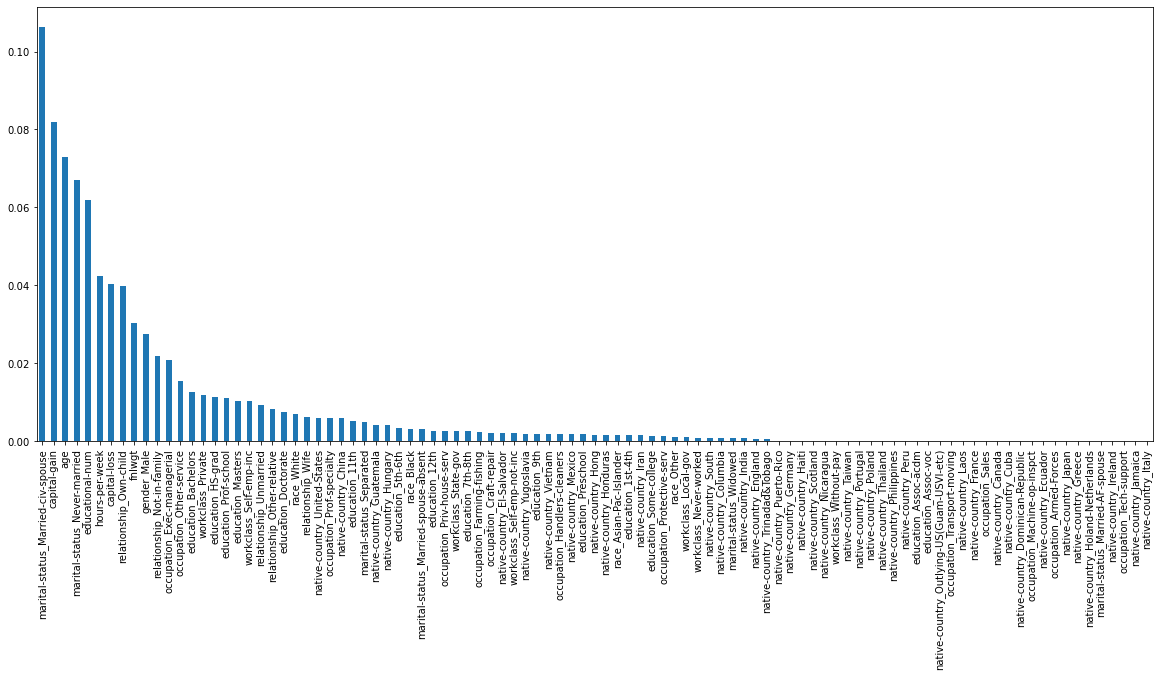

In [49]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# Select Top Features

In [50]:
from sklearn.feature_selection import SelectKBest

In [51]:
sel_top_cols=SelectKBest(mutual_info_classif,k=15)
sel_top_cols.fit(x_train,y_train)
x_train.columns[sel_top_cols.get_support()]

Index(['education_Bachelors', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Other-service', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'gender_Male',
       'age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [52]:
top_feature=['education_Bachelors','marital-status_Married-civ-spouse','marital-status_Never-married','occupation_Exec-managerial','occupation_Other-service','relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'gender_Male',
       'age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week']

In [53]:
# add target variable
top_feature=['education_Bachelors','marital-status_Married-civ-spouse','marital-status_Never-married','occupation_Exec-managerial','occupation_Other-service','relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'gender_Male',
       'age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week','income']

In [54]:
top_feature

['education_Bachelors',
 'marital-status_Married-civ-spouse',
 'marital-status_Never-married',
 'occupation_Exec-managerial',
 'occupation_Other-service',
 'relationship_Not-in-family',
 'relationship_Own-child',
 'relationship_Unmarried',
 'gender_Male',
 'age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

# take data of top features

In [55]:
top_featuredata=df_main.loc[:,top_feature]

In [56]:
top_featuredata

,education_Bachelors,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,gender_Male,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,0,0,1,0,0,0,1,0,1,25,226802,7,0,0,40,0
1,0,1,0,0,0,0,0,0,1,38,89814,9,0,0,50,0
2,0,1,0,0,0,0,0,0,1,28,336951,12,0,0,40,1
3,0,1,0,0,0,0,0,0,1,44,160323,10,7688,0,40,1
4,0,0,1,0,0,0,1,0,0,18,103497,10,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,0,0,27,257302,12,0,0,38,0
48838,0,1,0,0,0,0,0,0,1,40,154374,9,0,0,40,1
48839,0,0,0,0,0,0,0,1,0,58,151910,9,0,0,40,0
48840,0,0,1,0,0,0,1,0,1,22,201490,9,0,0,20,0


# building model on top selected features

In [57]:
X=top_featuredata.drop('income',axis=1)
Y=top_featuredata['income']

In [58]:
X.head()

,education_Bachelors,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,gender_Male,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0,0,1,0,0,0,1,0,1,25,226802,7,0,0,40
1,0,1,0,0,0,0,0,0,1,38,89814,9,0,0,50
2,0,1,0,0,0,0,0,0,1,28,336951,12,0,0,40
3,0,1,0,0,0,0,0,0,1,44,160323,10,7688,0,40
4,0,0,1,0,0,0,1,0,0,18,103497,10,0,0,30


# Spliting the Data using train test split 

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

#### Build one model without Scaling

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr=LogisticRegression()

In [62]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [63]:
Y_predlr=lr.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [65]:
print(classification_report(Y_test,Y_predlr))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11233
           1       0.72      0.27      0.39      3420

    accuracy                           0.80     14653
   macro avg       0.77      0.62      0.64     14653
weighted avg       0.79      0.80      0.77     14653



In [66]:
cf_matrix=confusion_matrix(Y_test,Y_predlr)

<AxesSubplot:>

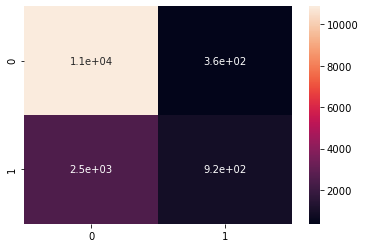

In [67]:
sns.heatmap(cf_matrix,annot=True)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
# checking the accuracy on training data
Y_pred_train=lr.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred_train,Y_train)
print('Training Dataset Accuracy',training_data_accuracy)


Training Dataset Accuracy 0.7950217906344146


# This is genralized model

# now do scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [71]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

# LogisticRegression

In [72]:
lr.fit(X_train_scale,Y_train)

LogisticRegression()

In [73]:
Ypred_scalerlr=lr.predict(X_test_scale)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [75]:
print(classification_report(Y_test,Ypred_scalerlr))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11233
           1       0.73      0.58      0.65      3420

    accuracy                           0.85     14653
   macro avg       0.80      0.76      0.78     14653
weighted avg       0.85      0.85      0.85     14653



In [76]:
cf_matrix=confusion_matrix(Y_test,Ypred_scalerlr)

<AxesSubplot:>

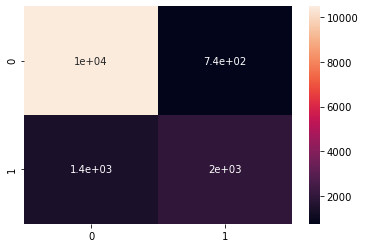

In [77]:
sns.heatmap(cf_matrix,annot=True)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
# checking the accuracy on training data
Ypred_scale_train=lr.predict(X_train_scale)
training_data_accuracy = accuracy_score(Ypred_scale_train,Y_train)
print('Training Dataset Accuracy',training_data_accuracy)


Training Dataset Accuracy 0.8431074322150399


In [80]:
#stratifiedkfold cross validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=6)
model1=LogisticRegression()
scores=sklearn.model_selection.cross_val_score(model1,X,Y,cv=skfold)
print(np.mean(scores))

0.7982679178938853


# Randomforest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [82]:
rfc.fit(X_train_scale,Y_train)

RandomForestClassifier()

In [83]:
# checking the accuracy on training data
Y_train_rfprediction = rfc.predict(X_train_scale)
training_data_accuracy = accuracy_score(Y_train_rfprediction,Y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9995612623943374


In [84]:
# accuracy score and classification report of the Random Forest
Y_predrfclassifier = rfc.predict(X_test_scale)
print(confusion_matrix(Y_test,Y_predrfclassifier))
print(accuracy_score(Y_test,Y_predrfclassifier))
print(classification_report(Y_test,Y_predrfclassifier))

[[10317   916]
 [ 1257  2163]]
0.8517027229918788
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11233
           1       0.70      0.63      0.67      3420

    accuracy                           0.85     14653
   macro avg       0.80      0.78      0.79     14653
weighted avg       0.85      0.85      0.85     14653



<AxesSubplot:>

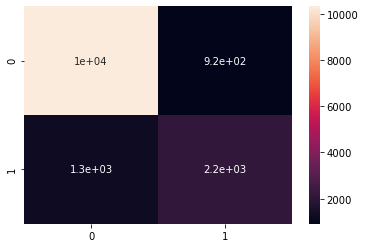

In [85]:
cf_matrix=confusion_matrix(Y_test,Y_predrfclassifier)
sns.heatmap(cf_matrix,annot=True)

In [86]:
#stratifiedkfold cross validation
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model2=RandomForestClassifier()
scores=sklearn.model_selection.cross_val_score(model2,X,Y,cv=skfold)
print(np.mean(scores))

0.8460137405014055


# XGboost

In [87]:
import xgboost
xgbmodel=xgboost.XGBClassifier()

In [88]:
xgbmodel

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [89]:
xgbmodel.fit(X_train_scale,Y_train)

[14:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
xgbmodel.fit(X_train_scale,Y_train)

[14:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
xgbpred=xgbmodel.predict(X_test_scale)

In [92]:
# checking the accuracy on training data
Y_train_xgbprediction = xgbmodel.predict(X_train_scale)
training_data_accuracy = accuracy_score(Y_train_xgbprediction,Y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.8896428675889906


In [93]:
# accuracy score and classification report of the XGboostmodel
Y_predxgb = xgbmodel.predict(X_test_scale)
print(confusion_matrix(Y_test,Y_predxgb))
print(accuracy_score(Y_test,Y_predxgb))
print(classification_report(Y_test,Y_predxgb))

[[10603   630]
 [ 1219  2201]]
0.8738142359926295
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11233
           1       0.78      0.64      0.70      3420

    accuracy                           0.87     14653
   macro avg       0.84      0.79      0.81     14653
weighted avg       0.87      0.87      0.87     14653



<AxesSubplot:>

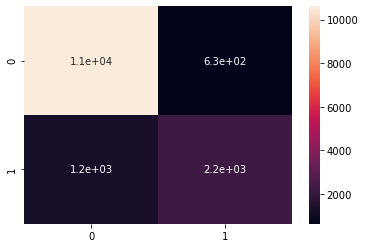

In [94]:
cf_matrix=confusion_matrix(Y_test,Y_predxgb)
sns.heatmap(cf_matrix,annot=True)

# use svm

In [95]:
 from sklearn import svm

In [96]:
# create svm classifer
clf=svm.SVC()

In [97]:
clf.fit(X_train_scale,Y_train)

SVC()

In [98]:
Y_predclf=clf.predict(X_test_scale)

In [99]:
# checking the accuracy on training data
Y_train_svcprediction = clf.predict(X_train_scale)
training_data_accuracy = accuracy_score(Y_train_svcprediction,Y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.8517359384597385


In [100]:
# accuracy score and classification report of the XGboostmodel
Y_predsvc = clf.predict(X_test_scale)
print(confusion_matrix(Y_test,Y_predsvc))
print(accuracy_score(Y_test,Y_predsvc))
print(classification_report(Y_test,Y_predsvc))

[[10554   679]
 [ 1409  2011]]
0.857503582884051
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11233
           1       0.75      0.59      0.66      3420

    accuracy                           0.86     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



<AxesSubplot:>

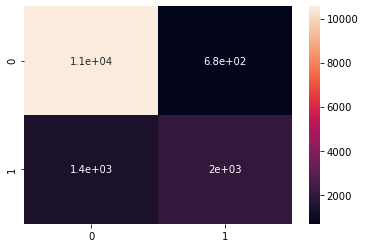

In [101]:
cf_matrix=confusion_matrix(Y_test,Y_predsvc)
sns.heatmap(cf_matrix,annot=True)

# Naive Bayes


In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gnb = GaussianNB()

In [104]:
gnb.fit(X_train_scale, Y_train)
y_pred = gnb.predict(X_test_scale)

In [105]:
# checking the accuracy on training data
Y_train_gnbprediction = gnb.predict(X_train_scale)
training_data_accuracy = accuracy_score(Y_train_gnbprediction,Y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.7813331773377402


In [106]:
Y_predgnb = gnb.predict(X_test_scale)
print(confusion_matrix(Y_test,Y_predgnb))
print(accuracy_score(Y_test,Y_predgnb))
print(classification_report(Y_test,Y_predgnb))

[[8694 2539]
 [ 517 2903]]
0.7914420255237835
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     11233
           1       0.53      0.85      0.66      3420

    accuracy                           0.79     14653
   macro avg       0.74      0.81      0.75     14653
weighted avg       0.85      0.79      0.80     14653



<AxesSubplot:>

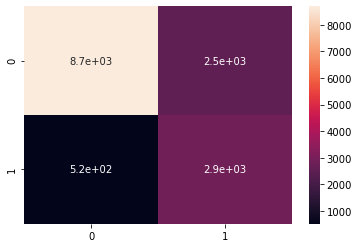

In [107]:
cf_matrix=confusion_matrix(Y_test,Y_predgnb)
sns.heatmap(cf_matrix,annot=True)

In [108]:
score=pd.read_excel('Adult_income_Capstone _Project _Score.xlsx')

In [109]:
score

,No,Model,Score
0,1,Xgboost Classifier,0.87
1,2,SVM,0.85
2,3,RandomforestClassifier,0.85
3,5,LogisticRegression,0.84
4,4,Navie Bayes,0.79


# auc roc curve

In [110]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train_scale, Y_train)

Y_pred_logistic = model_logistic.decision_function(X_test_scale)

In [111]:
from sklearn.svm import SVC
model_svc=SVC(kernel='rbf',random_state=4)
model_svc.fit(X_train_scale,Y_train)
y_pred_svmscale=model_svc.decision_function(X_test_scale)

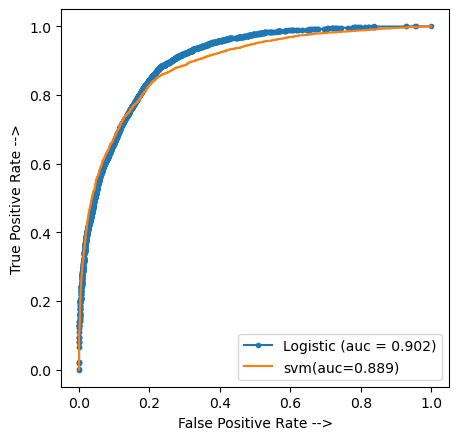

In [112]:
from sklearn.metrics import auc, roc_curve
logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, Y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr,svm_tpr,threshold=roc_curve(Y_test,y_pred_svmscale)
auc_svm=auc(svm_fpr,svm_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='svm(auc=%0.3f)'% auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')



plt.legend()

plt.show()

### Conclusion

- From this analysis we can say that, higher the age then there is higher salary for the users
- Also working hours per week is more then the income of the people is more so we can say that there is positive correlation in
between these two features
- There is age below 20 so we can say that these are the students or they are in learning phase which is why these people are not in earning
- In this dataset the value count of the male is more than the female so the income and the working hour per week of the male category
is also higher as compare to the female